In [53]:
import tensorflow as tf
import numpy as np
import pandas as pd



In [54]:
data=pd.read_csv("/content/sample_data/diabetes2.csv",header=None)

In [55]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:

data.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
data=data.astype('float')


In [58]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [59]:
data=data.to_numpy()

In [60]:
data.shape

(768, 9)

In [61]:


train = data[0:600]
test = data[600:]


In [62]:
train.shape

(600, 9)

In [63]:

test.shape

(168, 9)

In [64]:

train_feature = train[:,0:-1]
train_label = train[:,-1]
test_feature = test[:,0:-1]
test_label = test[:,-1]

In [65]:
train_feature.shape

(600, 8)

In [ ]:
train_feature.shape

(600, 8)

In [ ]:

train_feature[0].shape


(8,)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input ,Dense, Dropout


In [67]:

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(1,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [68]:

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(train_feature,train_label,epochs=100,validation_data=(test_feature,test_label)) 

Epoch 1/100
19/19 [==============================] - 2s 27ms/step - loss: 0.6943 - accuracy: 0.6433 - val_loss: 0.6822 - val_accuracy: 0.6429
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7056 - accuracy: 0.6483 - val_loss: 0.6769 - val_accuracy: 0.6429
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.6911 - accuracy: 0.6383 - val_loss: 0.6749 - val_accuracy: 0.6429
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 0.6868 - accuracy: 0.6467 - val_loss: 0.6693 - val_accuracy: 0.6429
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6744 - accuracy: 0.6483 - val_loss: 0.6657 - val_accuracy: 0.6429
Epoch 6/100
19/19 [==============================] - 0s 11ms/step - loss: 0.6725 - accuracy: 0.6433 - val_loss: 0.6630 - val_accuracy: 0.6429
Epoch 7/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6636 - accuracy: 0.6533 - val_loss: 0.6611 - val_accuracy: 0.6429
Epoch 8/

In [70]:
model.save("dia_save", save_format="h5")

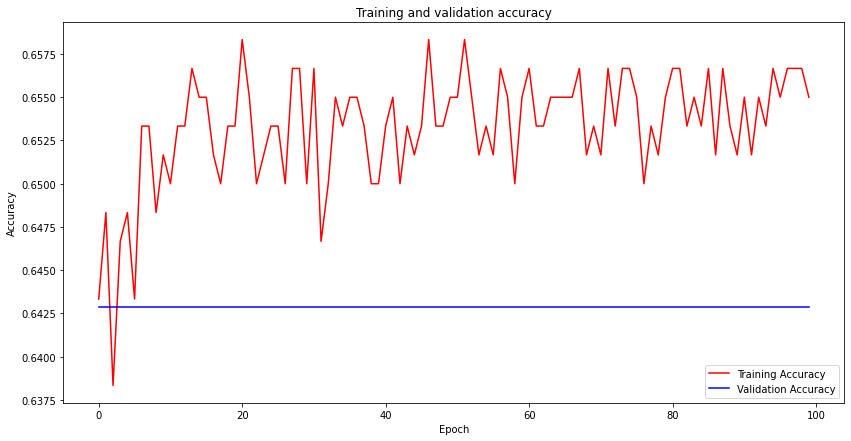

In [71]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss')

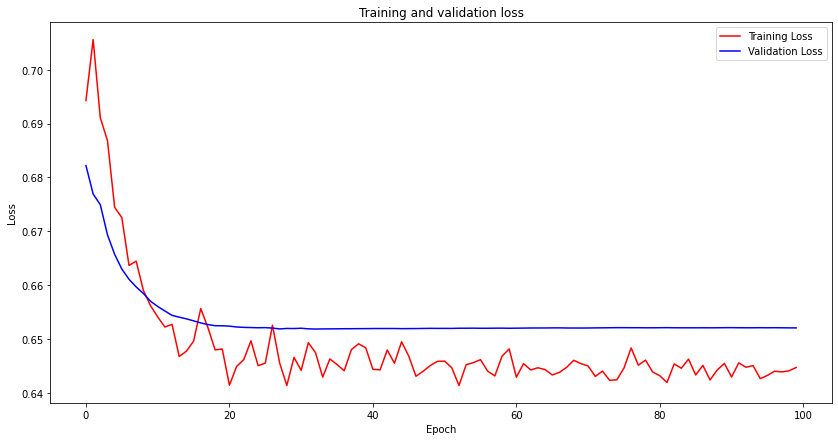

In [72]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')